# COURSE: Generate and visualize data in Python and MATLAB

## SECTION: Data distributions

### https://www.udemy.com/course/suv-data-mxc/?couponCode=201910

### INSTRUCTOR: sincxpress.com


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

---
# VIDEO: Normal and uniform
---


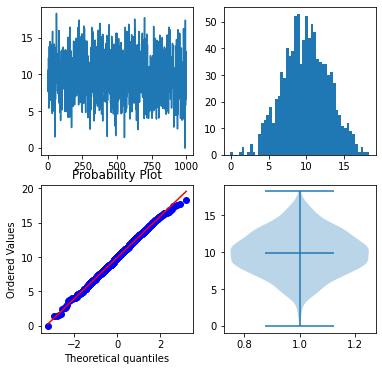

In [2]:
## Normally-distributed numbers

# parameters
stretch = 3  # variance (square of standard deviation)
shift = 10  # mean
n = 1000

# create data
data = stretch * np.random.randn(n) + shift

# plot
fig = plt.figure(figsize=[6, 6])

plt.subplot2grid((2, 2), (0, 0))
plt.plot(data)

plt.subplot2grid((2, 2), (0, 1))
plt.hist(data, 50)

plt.subplot2grid((2, 2), (1, 0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2, 2), (1, 1))
plt.violinplot(data, showmedians=True)
plt.show()

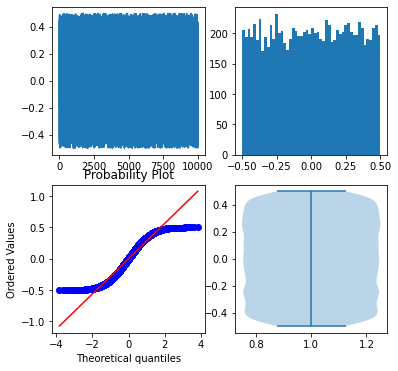

In [3]:
## Uniformly distributed numbers

# parameters
stretch = 1  # variance (square of standard deviation)
shift = 0  # mean
n = 10000

# create data
data = np.random.rand(n) * stretch + shift - .5 * stretch

# plot
fig = plt.figure(figsize=[6, 6])

plt.subplot2grid((2, 2), (0, 0))
plt.plot(data)

plt.subplot2grid((2, 2), (0, 1))
plt.hist(data, 50)

# QQ plot
plt.subplot2grid((2, 2), (1, 0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2, 2), (1, 1))
plt.violinplot(data)
plt.show()

---
# VIDEO: QQ plot
---


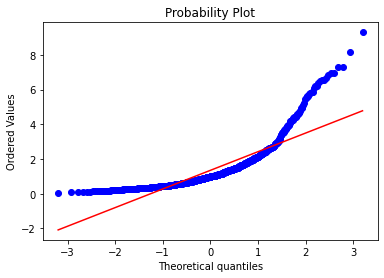

In [4]:
# generate data
n = 1000
data = np.exp(np.random.randn(n) * .8)  # log-norm distribution

stats.probplot(data, dist="norm", plot=plt)
plt.show()

---
# VIDEO: Poisson
---


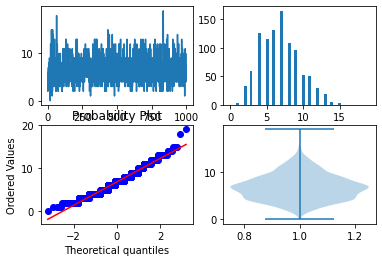

In [5]:
# number of points
n = 1000

# lambda parameter
l = 7

# initialize data
data = np.zeros(n)

# loop over points
for i in range(0, n):
  # reset values
  p = 1
  k = 1

  # randomly decrease p until it exceeds lambda (the threshold)
  while p > np.exp(-l):
    p = p * np.random.rand(1)  # rand is [0,1] so p keeps getting smaller
    k = k + 1

  # data point for this iteration
  data[i] = k - 2

# plot
plt.subplot2grid((2, 2), (0, 0))
plt.plot(data)

plt.subplot2grid((2, 2), (0, 1))
plt.hist(data, 50)

plt.subplot2grid((2, 2), (1, 0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2, 2), (1, 1))
plt.violinplot(data)
plt.show()

---
# VIDEO: Log-normal
---


170.1438800849761 5.010360341361174


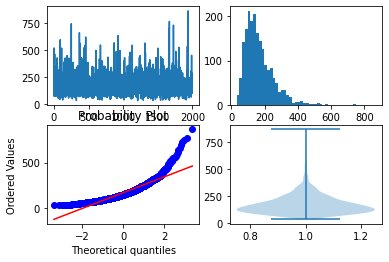

In [6]:
shift = 5  # mean
stretch = .5  # standard deviation
n = 2000  # number of data points

# generate data
data = stretch * np.random.randn(n) + shift
data = np.exp(data)

print(np.mean(data), np.mean(np.log(data)))
# plot
plt.subplot2grid((2, 2), (0, 0))
plt.plot(data)

plt.subplot2grid((2, 2), (0, 1))
plt.hist(data, 50)

plt.subplot2grid((2, 2), (1, 0))
stats.probplot(data, dist="norm", plot=plt)

plt.subplot2grid((2, 2), (1, 1))
plt.violinplot(data)
plt.show()

---
# VIDEO: Distribution quality (Signal-to-noise ratio)
---


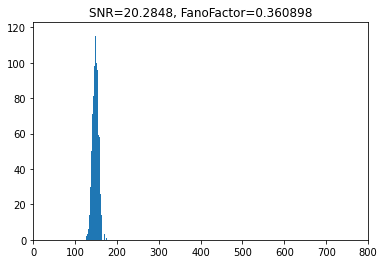

In [7]:
# me: not important

# generate data
m = 5  # mean
s = .05  # standard deviation
n = 2000  # number of data points
data = np.exp(s * np.random.randn(n) + m)

# descriptive stats
meanval = np.mean(data)
stdev = np.std(data)
variance = np.var(data)

# signal-to-noise ratio
SNR = meanval / stdev

# Fano factor
fano = variance / meanval

# plot
plt.hist(data, 50)
plt.xlim([0, 800])
plt.title('SNR=%g, FanoFactor=%g' % (SNR, fano))
plt.show()

---
# VIDEO: Cohen's d for separating distributions
---


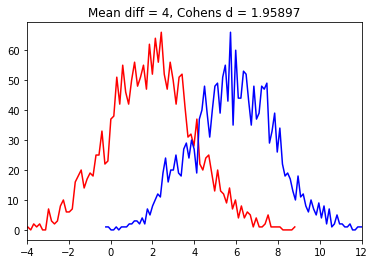

In [8]:
# me: not important

mean1 = 2  # mean of distribution 1
mean2 = 6  # mean of distribution 2
stretch = 2  # standard deviation (both distributions)

n = 2000  # sample points per distribution

# generate datasets
data1 = np.random.randn(n) * stretch + mean1
data2 = np.random.randn(n) * stretch + mean2

# compute empirical means
emean1 = np.mean(data1)
emean2 = np.mean(data2)

# get histograms for plotting
[y1, x1] = np.histogram(data1, 100)
[y2, x2] = np.histogram(data2, 100)

# Compute Cohen's D as measure of separability
cohenD = abs(emean1 - emean2) / ((np.std(data1) + np.std(data2)) / 2)

# plot
plt.plot(x1[:-1], y1, 'r')
plt.plot(x2[:-1], y2, 'b')
plt.xlim([-4, 12])
plt.title('Mean diff = %g, Cohen'
          's d = %g' % (abs(mean2 - mean1), cohenD))
plt.show()